In [2]:
!pip install cobra
!pip install matplotlib
!pip install matplotlib-venn
!pip install seaborn
!pip install ipympl
!pip install upsetplot
!pip install pillow


[notice] A new release of pip is available: 25.1.1 -> 25.2
[notice] To update, run: python3 -m pip install --upgrade pip

[notice] A new release of pip is available: 25.1.1 -> 25.2
[notice] To update, run: python3 -m pip install --upgrade pip

[notice] A new release of pip is available: 25.1.1 -> 25.2
[notice] To update, run: python3 -m pip install --upgrade pip

[notice] A new release of pip is available: 25.1.1 -> 25.2
[notice] To update, run: python3 -m pip install --upgrade pip

[notice] A new release of pip is available: 25.1.1 -> 25.2
[notice] To update, run: python3 -m pip install --upgrade pip

[notice] A new release of pip is available: 25.1.1 -> 25.2
[notice] To update, run: python3 -m pip install --upgrade pip

[notice] A new release of pip is available: 25.1.1 -> 25.2
[notice] To update, run: python3 -m pip install --upgrade pip


In [30]:
import pandas as pd 
import math
import sys

import numpy as np
from scipy.stats import ttest_ind
import cobra
import matplotlib
from matplotlib_venn import venn3
import matplotlib.pyplot as plt
from scipy import stats
import seaborn as sns
from matplotlib.widgets import CheckButtons
from matplotlib.widgets import Slider
import matplotlib.animation as animation
matplotlib.use('Agg')

source_dir = 'src'
sys.path.append(source_dir)

from transcriptomics.get_gene_transcript_dictionary import get_gene_transcript_dictionary
from transcriptomics.get_reaction_transcript_dictionary import get_reaction_transcript_dictionary

In [31]:
fpkm_df = pd.read_csv("fpkm_counts_with_annotations.csv")


In [5]:
fpkm_df.head()

,Geneid,EBY_1,EBY_2,EBY_3,EBY-U_1,EBY-GNSR_1,EBY-GNSR_2,EBY-GNHR_1,EBY-GNHR_2,EBY-GNHR_3,EBY-GNUR_1,EBY-GNUR_2,EBY-GNUR_3,JGI_annotation,KEGG_annotation
0,jgi|Sacce1|1000|YDL018C,47.55,49.28,46.03,27.44,66.92,56.75,26.36,30.20,32.08,45.72,44.23,46.24,NaN,no KO assigned | (RefSeq) ERP3; Erp3p
1,jgi|Sacce1|1001|YDL017W,20.11,20.75,19.72,26.48,25.70,28.76,22.21,20.59,22.80,33.20,36.83,33.11,Protein kinase,K02214 cell division control protein 7 [EC:2.7...
2,jgi|Sacce1|1002|YDL016C,5.68,6.50,3.91,4.32,7.41,7.81,2.39,2.12,2.39,5.77,2.15,3.29,NaN,NaN
3,jgi|Sacce1|1003|YDL015C,258.04,263.32,271.20,176.40,287.94,309.80,97.96,133.22,114.73,172.79,189.77,190.81,3-oxo-5-alpha-steroid 4-dehydrogenase,K10258 very-long-chain enoyl-CoA reductase [EC...
4,jgi|Sacce1|1004|YDL014W,338.89,352.15,227.14,32.43,264.66,275.53,33.94,28.27,20.38,70.73,106.82,72.10,NaN,K14563 rRNA 2'-O-methyltransferase fibrillarin...


In [6]:


fpkm_df.head()

,Geneid,EBY_1,EBY_2,EBY_3,EBY-U_1,EBY-GNSR_1,EBY-GNSR_2,EBY-GNHR_1,EBY-GNHR_2,EBY-GNHR_3,EBY-GNUR_1,EBY-GNUR_2,EBY-GNUR_3,JGI_annotation,KEGG_annotation
0,jgi|Sacce1|1000|YDL018C,47.55,49.28,46.03,27.44,66.92,56.75,26.36,30.20,32.08,45.72,44.23,46.24,NaN,no KO assigned | (RefSeq) ERP3; Erp3p
1,jgi|Sacce1|1001|YDL017W,20.11,20.75,19.72,26.48,25.70,28.76,22.21,20.59,22.80,33.20,36.83,33.11,Protein kinase,K02214 cell division control protein 7 [EC:2.7...
2,jgi|Sacce1|1002|YDL016C,5.68,6.50,3.91,4.32,7.41,7.81,2.39,2.12,2.39,5.77,2.15,3.29,NaN,NaN
3,jgi|Sacce1|1003|YDL015C,258.04,263.32,271.20,176.40,287.94,309.80,97.96,133.22,114.73,172.79,189.77,190.81,3-oxo-5-alpha-steroid 4-dehydrogenase,K10258 very-long-chain enoyl-CoA reductase [EC...
4,jgi|Sacce1|1004|YDL014W,338.89,352.15,227.14,32.43,264.66,275.53,33.94,28.27,20.38,70.73,106.82,72.10,NaN,K14563 rRNA 2'-O-methyltransferase fibrillarin...


/tmp/ipykernel_2154/3906591000.py:12: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout() # Adjusts plot for a tight layout


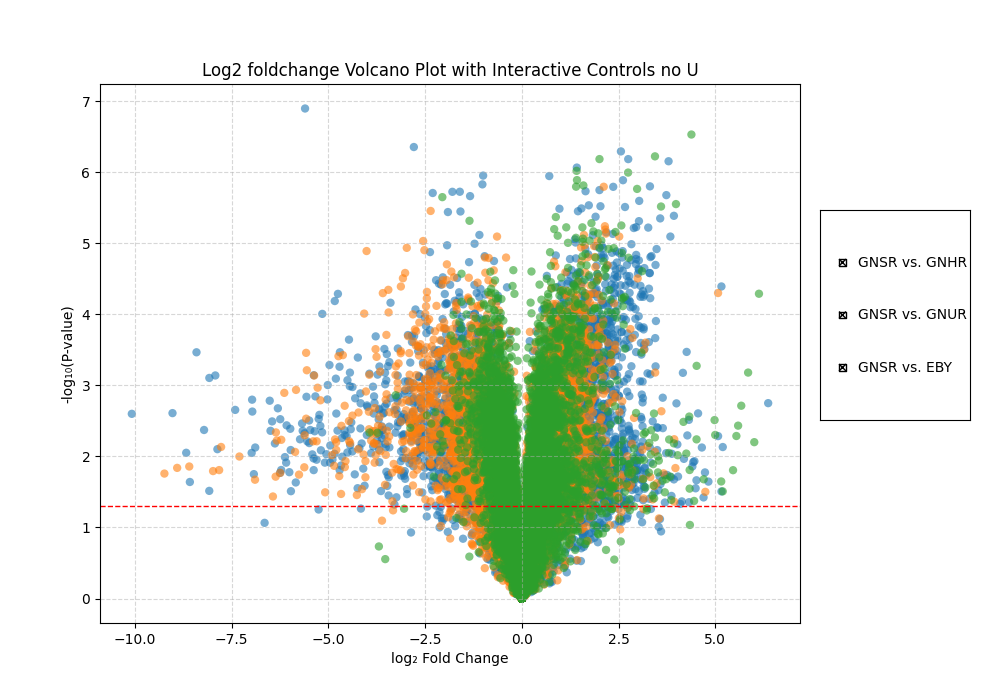

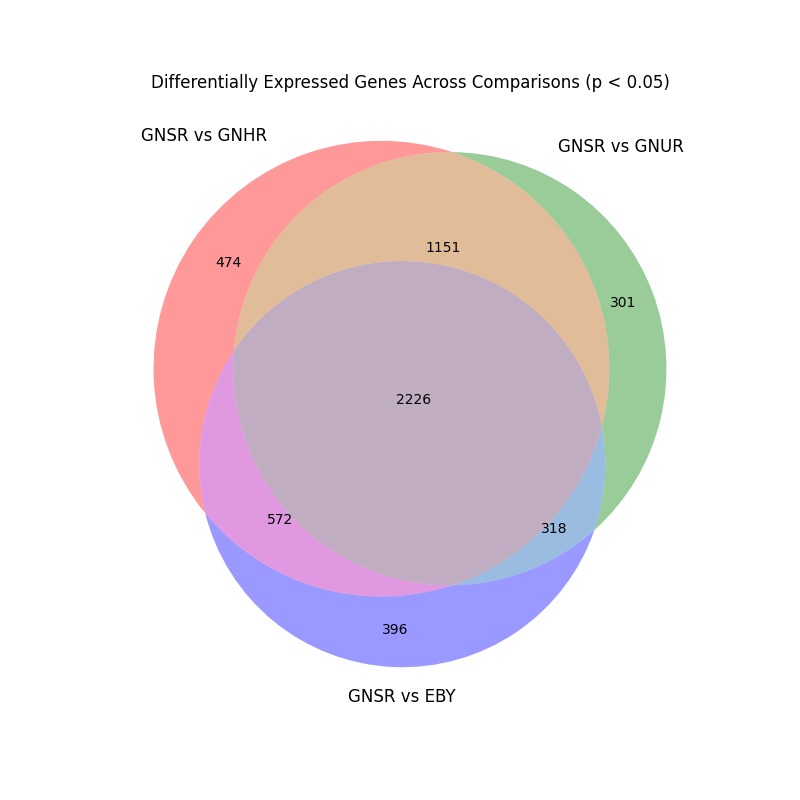

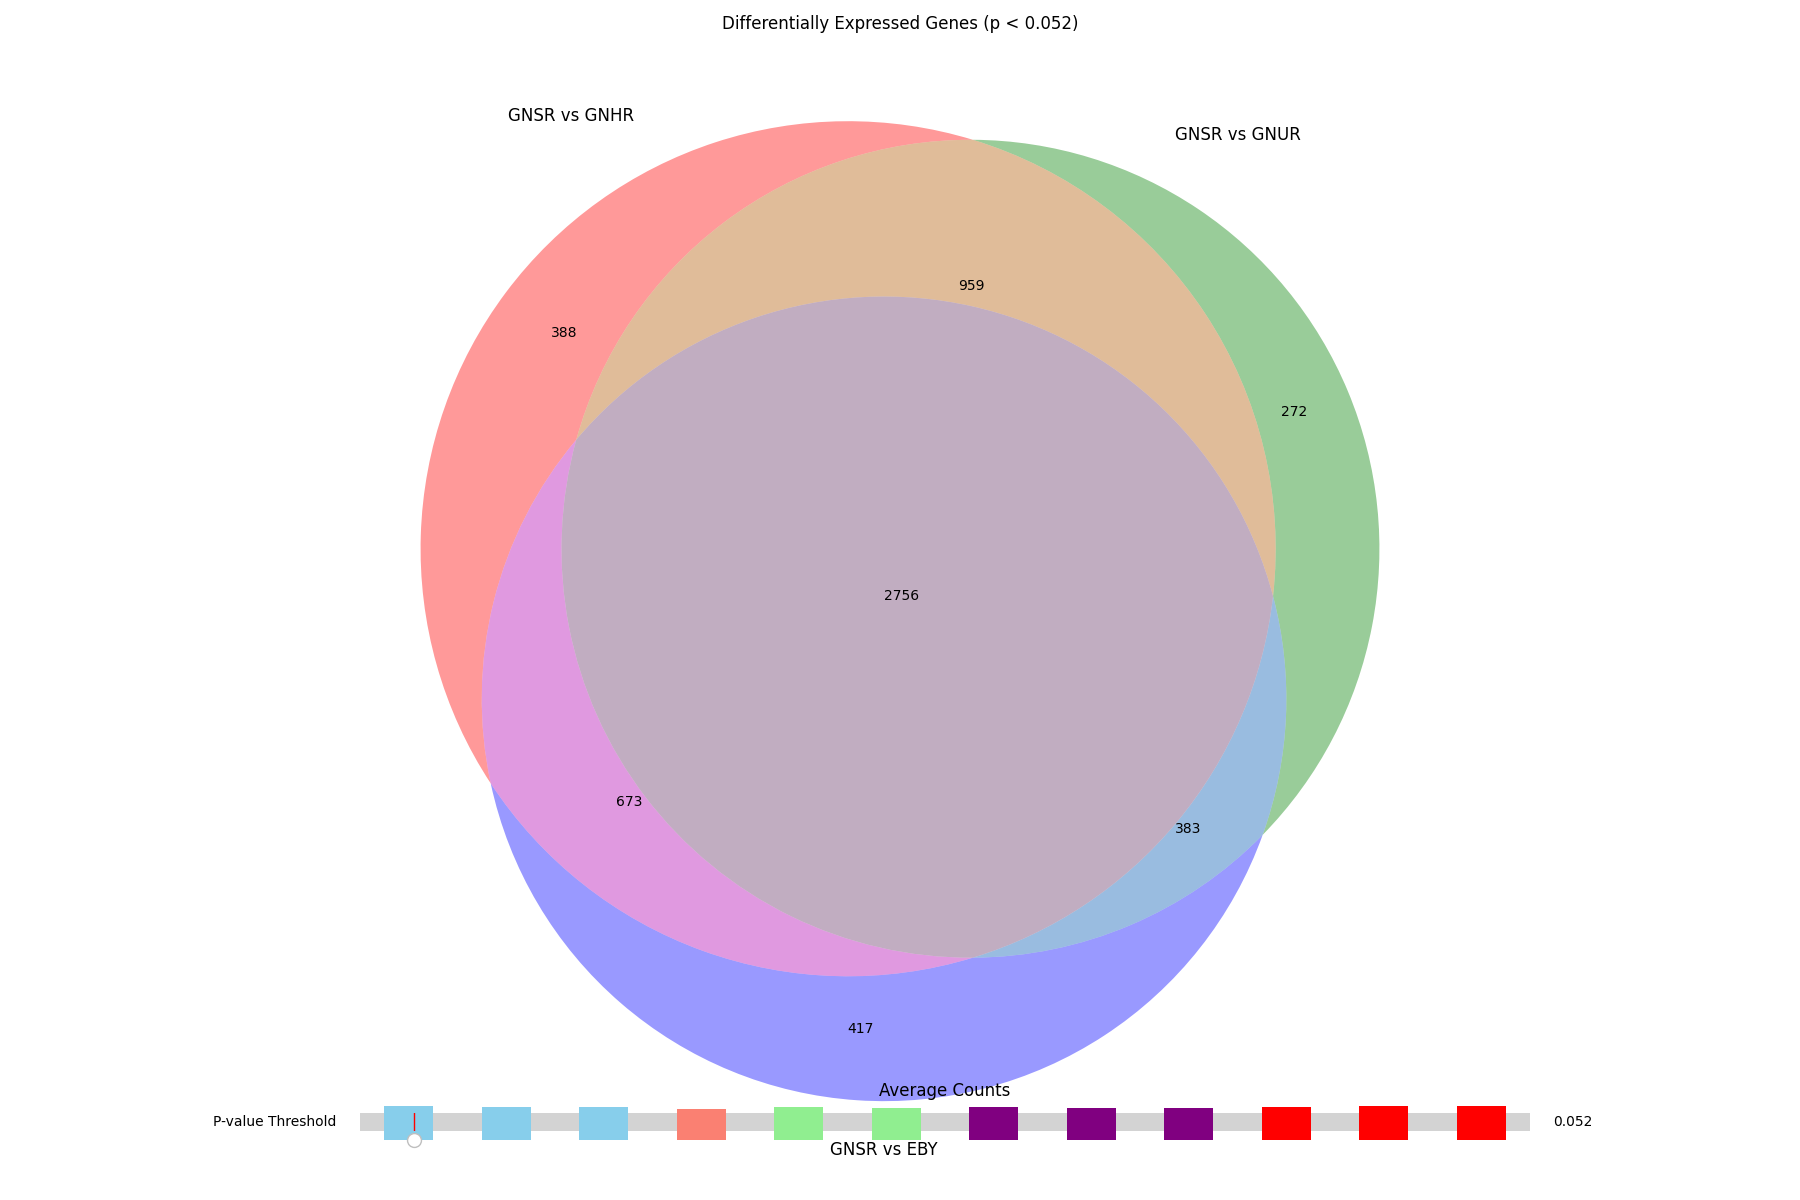

In [32]:
column = fpkm_df.drop(columns='JGI_annotation')
column2 = column.drop(columns='KEGG_annotation')
column3 = column2.drop(columns='Geneid')
column_averages = column3.mean()
column_averages.plot(kind='bar', figsize=(18, 12), color=['skyblue','skyblue','skyblue', 'salmon', 'lightgreen','lightgreen','purple','purple','purple','red','red','red'])

# 3. Add a title and labels for clarity
plt.title('Average Counts')
plt.ylabel('Counts')
plt.xlabel('Strains')
plt.xticks(rotation=0) # Keeps the x-axis labels horizontal
plt.tight_layout() # Adjusts plot for a tight layout

# 4. Display the plot
plt.show()

In [8]:
fpkm_df.head()

,Geneid,EBY_1,EBY_2,EBY_3,EBY-U_1,EBY-GNSR_1,EBY-GNSR_2,EBY-GNHR_1,EBY-GNHR_2,EBY-GNHR_3,EBY-GNUR_1,EBY-GNUR_2,EBY-GNUR_3,JGI_annotation,KEGG_annotation
0,jgi|Sacce1|1000|YDL018C,47.55,49.28,46.03,27.44,66.92,56.75,26.36,30.20,32.08,45.72,44.23,46.24,NaN,no KO assigned | (RefSeq) ERP3; Erp3p
1,jgi|Sacce1|1001|YDL017W,20.11,20.75,19.72,26.48,25.70,28.76,22.21,20.59,22.80,33.20,36.83,33.11,Protein kinase,K02214 cell division control protein 7 [EC:2.7...
2,jgi|Sacce1|1002|YDL016C,5.68,6.50,3.91,4.32,7.41,7.81,2.39,2.12,2.39,5.77,2.15,3.29,NaN,NaN
3,jgi|Sacce1|1003|YDL015C,258.04,263.32,271.20,176.40,287.94,309.80,97.96,133.22,114.73,172.79,189.77,190.81,3-oxo-5-alpha-steroid 4-dehydrogenase,K10258 very-long-chain enoyl-CoA reductase [EC...
4,jgi|Sacce1|1004|YDL014W,338.89,352.15,227.14,32.43,264.66,275.53,33.94,28.27,20.38,70.73,106.82,72.10,NaN,K14563 rRNA 2'-O-methyltransferase fibrillarin...


In [9]:
EBY_AVE = fpkm_df[['EBY_1', 'EBY_2', 'EBY_3']].mean(axis=1) # averages the 3 EBY columns
EBYU = fpkm_df[['EBY-U_1']].mean(axis=1) # puts the EBY-U_1 in the same shape as EBY_AVE
EBY_GNSR_AVE = fpkm_df[['EBY-GNSR_1', 'EBY-GNSR_2']].mean(axis=1) # averages 2 GNSR columns
EBY_GNHR_AVE = fpkm_df[['EBY-GNHR_1', 'EBY-GNHR_2', 'EBY-GNHR_3']].mean(axis=1) # averages 3 GNHR columns
EBY_GNUR_AVE = fpkm_df[['EBY-GNUR_1', 'EBY-GNUR_2', 'EBY-GNUR_3']].mean(axis=1) # averages 3 GNUR columns


def calculate_log2fc(treatment_series, control_series, pseudocount=1): # log2fold change function
    """Calculates log2 fold change between two pandas Series."""
    treatment_adjusted = treatment_series + pseudocount
    control_adjusted = control_series + pseudocount
    return np.log2(treatment_adjusted / control_adjusted) 

In [10]:
# Comparison 1: GNSR vs. GNHR
log2fc_gnsr_vs_gnhr = calculate_log2fc(EBY_GNSR_AVE, EBY_GNHR_AVE)

# Comparison 2: GNSR vs. GNUR
log2fc_gnsr_vs_gnur = calculate_log2fc(EBY_GNSR_AVE, EBY_GNUR_AVE)

# Comparison 3: GNSR vs. EBY
log2fc_gnsr_vs_eby = calculate_log2fc(EBY_GNSR_AVE, EBY_AVE)

# Comparison 4: GNUR vs. U
log2fc_gnur_vs_u = calculate_log2fc(EBY_GNUR_AVE, EBYU)

results_df = pd.DataFrame({
    'log2fc_GNSR_vs_GNHR': log2fc_gnsr_vs_gnhr,
    'log2fc_GNSR_vs_GNUR': log2fc_gnsr_vs_gnur,
    'log2fc_GNSR_vs_EBY': log2fc_gnsr_vs_eby,
    'log2fc_GNUR_vs_U': log2fc_gnur_vs_u
})

# Display the first few rows of results
print(results_df.head())

   log2fc_GNSR_vs_GNHR  log2fc_GNSR_vs_GNUR  log2fc_GNSR_vs_EBY  \
0             1.040553             0.437547            0.370018   
1             0.303983            -0.325705            0.413619   
2             1.383547             0.862141            0.436231   
3             1.366445             0.693255            0.177329   
4             3.248247             1.686621           -0.179722   

   log2fc_GNUR_vs_U  
0          0.706100  
1          0.364552  
2         -0.167554  
3          0.064076  
4          1.332962  


In [11]:
gnsr_cols = ['EBY-GNSR_1', 'EBY-GNSR_2']
eby_cols = ['EBY_1', 'EBY_2', 'EBY_3']
gnhr_cols = ['EBY-GNHR_1', 'EBY-GNHR_2', 'EBY-GNHR_3']
gnur_cols = ['EBY-GNUR_1', 'EBY-GNUR_2', 'EBY-GNUR_3']

# Perform an independent t-test for each row (gene)
# The 'equal_var=False' handles cases where the groups have different variances
# The '.pvalue' at the end extracts just the p-value from the test result
p_values_gnsr_vs_gnhr = stats.ttest_ind(
    fpkm_df[gnsr_cols],
    fpkm_df[gnhr_cols],
    axis=1,
    equal_var=False
).pvalue

p_values_gnsr_vs_gnur = stats.ttest_ind(
    fpkm_df[gnsr_cols],
    fpkm_df[gnur_cols],
    axis=1,
    equal_var=False
).pvalue

p_values_gnsr_vs_eby = stats.ttest_ind(
    fpkm_df[gnsr_cols],
    fpkm_df[eby_cols],
    axis=1,
    equal_var=False
).pvalue

p_values_gnur_vs_u = stats.ttest_ind(
    fpkm_df[gnur_cols],
    fpkm_df['EBY-U_1'],
    axis=1,
    equal_var=False
).pvalue


/home/codespace/.local/lib/python3.12/site-packages/scipy/stats/_axis_nan_policy.py:611: RuntimeWarning: Precision loss occurred in moment calculation due to catastrophic cancellation. This occurs when the data are nearly identical. Results may be unreliable.
  res = hypotest_fun_out(*samples, axis=axis, **kwds)
/home/codespace/.local/lib/python3.12/site-packages/scipy/stats/_axis_nan_policy.py:611: RuntimeWarning: Precision loss occurred in moment calculation due to catastrophic cancellation. This occurs when the data are nearly identical. Results may be unreliable.
  res = hypotest_fun_out(*samples, axis=axis, **kwds)
/home/codespace/.local/lib/python3.12/site-packages/scipy/stats/_axis_nan_policy.py:611: RuntimeWarning: Precision loss occurred in moment calculation due to catastrophic cancellation. This occurs when the data are nearly identical. Results may be unreliable.
  res = hypotest_fun_out(*samples, axis=axis, **kwds)


In [12]:
# Create a DataFrame for the first comparison
df1 = pd.DataFrame({
    'log2_fold_change': log2fc_gnsr_vs_gnhr,
    'p_value': p_values_gnsr_vs_gnhr, # The p-values you just calculated
    'comparison': 'GNSR vs. GNHR'
})

# Create a DataFrame for the second comparison
df2 = pd.DataFrame({
    'log2_fold_change': log2fc_gnsr_vs_gnur,
    'p_value': p_values_gnsr_vs_gnur, # The p-values you just calculated
    'comparison': 'GNSR vs. GNUR'
})

# Create a DataFrame for the third comparison
df3= pd.DataFrame({
    'log2_fold_change': log2fc_gnsr_vs_eby,
    'p_value': p_values_gnsr_vs_eby, # The p-values you just calculated
    'comparison': 'GNSR vs. EBY'
})

# Create a DataFrame for the first comparison
df4 = pd.DataFrame({
    'log2_fold_change': log2fc_gnsr_vs_gnhr,
    'p_value': p_values_gnur_vs_u, # The p-values you just calculated
    'comparison': 'GNUR vs. U'
})

plot_df = pd.concat([df1, df2, df3, df4]).reset_index(drop=True) # combining into one dataframe

plot_df['-log10(p_value)'] = -np.log10(plot_df['p_value'].fillna(1))

plot_df_NO_U = pd.concat([df1, df2, df3]).reset_index(drop=True)
plot_df_NO_U['-log10(p_value)'] = -np.log10(plot_df['p_value'].fillna(1))



/home/codespace/.local/lib/python3.12/site-packages/pandas/core/arraylike.py:399: RuntimeWarning: divide by zero encountered in log10
  result = getattr(ufunc, method)(*inputs, **kwargs)
/home/codespace/.local/lib/python3.12/site-packages/pandas/core/arraylike.py:399: RuntimeWarning: divide by zero encountered in log10
  result = getattr(ufunc, method)(*inputs, **kwargs)


In [13]:
plot_df_NO_U.head()

,log2_fold_change,p_value,comparison,-log10(p_value)
0,1.040553,0.073900,GNSR vs. GNHR,1.131358
1,0.303983,0.133726,GNSR vs. GNHR,0.873785
2,1.383547,0.007939,GNSR vs. GNHR,2.100257
3,1.366445,0.002520,GNSR vs. GNHR,2.598541
4,3.248247,0.000677,GNSR vs. GNHR,3.169231


In [14]:
plt.figure(figsize=(8, 6))

# Use Seaborn's scatterplot, coloring by the 'comparison' column
sns.scatterplot(
    data=plot_df_NO_U,
    x='log2_fold_change',
    y='-log10(p_value)',
    hue='comparison', # This will color the dots for each comparison group
    alpha=0.6,
    edgecolor='none'
)

# Add lines for significance and fold-change cutoffs (optional)
plt.axhline(y=-np.log10(0.05), color='r', linestyle='--', label='P-value < 0.05')
plt.axvline(x=1, color='b', linestyle='--')
plt.axvline(x=-1, color='b', linestyle='--')

# Customize labels and title
plt.xlabel("log₂ Fold Change")
plt.ylabel("-log₁₀(P-value)")
plt.legend()
plt.grid(True, which='both', linestyle='--', linewidth=0.5)

plt.show()
plt.savefig('volcano_plot.png', dpi=300, bbox_inches='tight')

In [15]:
plt.figure(figsize=(8, 6))

# Use Seaborn's scatterplot, coloring by the 'comparison' column
sns.scatterplot(
    data=plot_df,
    x='log2_fold_change',
    y='-log10(p_value)',
    hue='comparison', # This will color the dots for each comparison group
    alpha=0.6,
    edgecolor='none'
)

# Add lines for significance and fold-change cutoffs (optional)
plt.axhline(y=-np.log10(0.05), color='r', linestyle='--', label='P-value < 0.05')
plt.axvline(x=1, color='b', linestyle='--')
plt.axvline(x=-1, color='b', linestyle='--')

# Customize labels and title
plt.xlabel("log₂ Fold Change")
plt.ylabel("-log₁₀(P-value)")
plt.legend()
plt.grid(True, which='both', linestyle='--', linewidth=0.5)

plt.show()

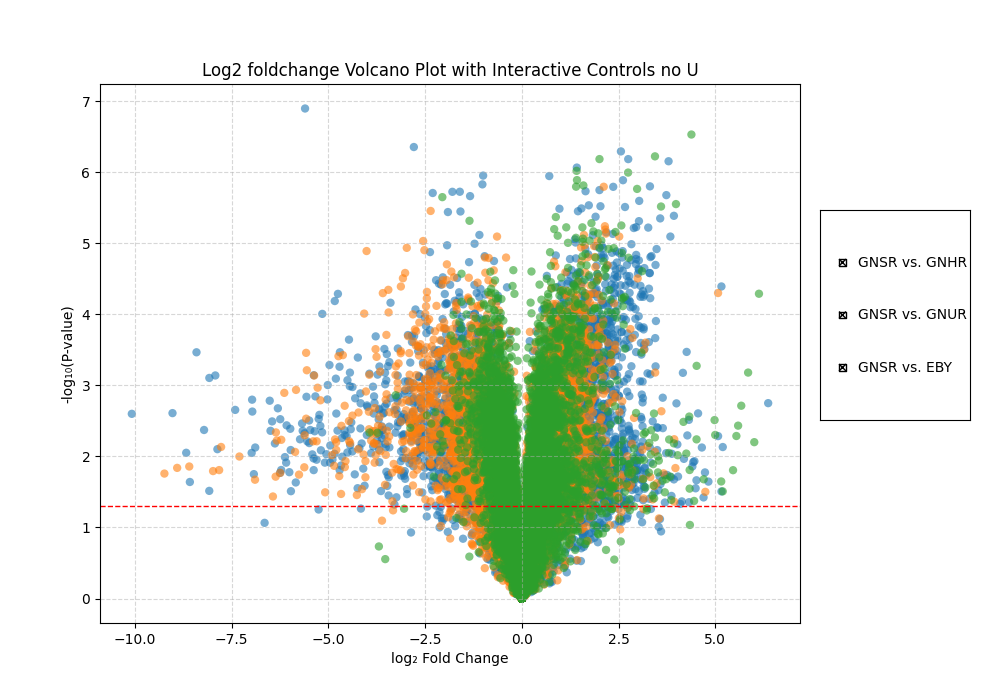

In [16]:
%matplotlib widget

fig, ax = plt.subplots(figsize=(10, 7))
plt.subplots_adjust(left=0.1, right=0.8)

lines = {} # Dictionary to store plot artists
for group_name in plot_df_NO_U['comparison'].unique():
    group_df = plot_df_NO_U[plot_df_NO_U['comparison'] == group_name]
    # Use ax.scatter() to plot the data
    line = ax.scatter(
        group_df['log2_fold_change'],
        group_df['-log10(p_value)'],
        label=group_name,
        alpha=0.6,
        edgecolor='none'
    )
    lines[group_name] = line

# Add labels and styling to the main plot
ax.set_xlabel("log₂ Fold Change")
ax.set_ylabel("-log₁₀(P-value)")
ax.set_title("Log2 foldchange Volcano Plot with Interactive Controls no U")
ax.grid(True, linestyle='--', alpha=0.5)
ax.axhline(y=-np.log10(0.05), color='r', linestyle='--', lw=1)


# 3. CREATE THE CHECKBUTTON WIDGET
# Define the area where the buttons will live (right side of the plot)
rax = plt.axes([0.82, 0.4, 0.15, 0.3]) # [left, bottom, width, height]

labels = [str(line.get_label()) for line in lines.values()]
visibility = [line.get_visible() for line in lines.values()]
check = CheckButtons(rax, labels, visibility)

# 4. DEFINE THE FUNCTION TO BE CALLED ON BUTTON CLICK
def update_visibility(label):
    """This function will turn the visibility of a plot line on or off."""
    line = lines[label]
    line.set_visible(not line.get_visible())
    plt.draw() # Redraw the plot to show the change

# 5. CONNECT THE WIDGET TO THE FUNCTION
check.on_clicked(update_visibility)

plt.show()



In [17]:
fig, ax = plt.subplots(figsize=(10, 7))
plt.subplots_adjust(left=0.1, right=0.8)

lines = {} # Dictionary to store plot artists
for group_name in plot_df_NO_U['comparison'].unique():
    group_df = plot_df_NO_U[plot_df_NO_U['comparison'] == group_name]
    line = ax.scatter(
        group_df['log2_fold_change'],
        group_df['-log10(p_value)'],
        label=group_name,
        alpha=0.6,
        edgecolor='none'
    )
    lines[group_name] = line

# Add labels and styling to the main plot
ax.set_xlabel("log₂ Fold Change")
ax.set_ylabel("-log₁₀(P-value)")
ax.grid(True, linestyle='--', alpha=0.5)
ax.axhline(y=-np.log10(0.05), color='r', linestyle='--', lw=1)

# Create the CheckButtons widget
rax = plt.axes([0.82, 0.4, 0.15, 0.3])
labels = [str(line.get_label()) for line in lines.values()]
check = CheckButtons(rax, labels, [True]*len(labels))

# --- Step 2: Define the Animation Function (with the fix) ---
active_color = 'lightgreen'
inactive_color = 'white'

def update_animation(frame_num, artists, check_widget):
    artist_labels = list(artists.keys())
    
    # Update the visibility of the scatter plot data
    for i, label in enumerate(artist_labels):
        artists[label].set_visible(i == frame_num)
        
    # **FIX IS HERE:** Use .ax.patches to access the rectangles
    for i, patch in enumerate(check_widget.ax.patches):
        patch.set_facecolor(active_color if i == frame_num else inactive_color)
        
    # Update the title to show which group is currently displayed
    ax.set_title(f"Displaying: {artist_labels[frame_num]}")
    
    # Return all the artists that were modified
    return list(artists.values()) + check_widget.ax.patches

# --- Step 3: Create and Save the Animation ---
ani = animation.FuncAnimation(
    fig, 
    update_animation, 
    frames=len(lines),
    fargs=(lines, check),
    interval=800
)

ani.save('volcano_plot_animation.gif', writer='pillow', fps=1)
plt.close(fig) # Close the figure to prevent static display

print("Animated GIF 'volcano_plot_animation.gif' saved successfully!")

Animated GIF 'volcano_plot_animation.gif' saved successfully!


In [18]:
EBY_1_gene_transcripts = get_gene_transcript_dictionary(fpkm_df, 'EBY_1')
EBY_2_gene_transcripts = get_gene_transcript_dictionary(fpkm_df, 'EBY_2')
EBY_3_gene_transcripts = get_gene_transcript_dictionary(fpkm_df, 'EBY_3')

EBY_U_1_gene_transcripts = get_gene_transcript_dictionary(fpkm_df, 'EBY-U_1')

EBY_GNSR_1_gene_transcripts = get_gene_transcript_dictionary(fpkm_df, 'EBY-GNSR_1')
EBY_GNSR_2_gene_transcripts = get_gene_transcript_dictionary(fpkm_df, 'EBY-GNSR_2')

EBY_GNHR_1_gene_transcripts = get_gene_transcript_dictionary(fpkm_df, 'EBY-GNHR_1')
EBY_GNHR_2_gene_transcripts = get_gene_transcript_dictionary(fpkm_df, 'EBY-GNHR_2')
EBY_GNHR_3_gene_transcripts = get_gene_transcript_dictionary(fpkm_df, 'EBY-GNHR_3')

EBY_GNUR_1_gene_transcripts = get_gene_transcript_dictionary(fpkm_df, 'EBY-GNUR_1')
EBY_GNUR_2_gene_transcripts = get_gene_transcript_dictionary(fpkm_df, 'EBY-GNUR_2')
EBY_GNUR_3_gene_transcripts = get_gene_transcript_dictionary(fpkm_df, 'EBY-GNUR_3')


EBY_1_gene_transcripts

{'': inf,
 'no KO assigned | (RefSeq) ERP3; Erp3p': 47.55,
 'K02214 cell division control protein 7 [EC:2.7.11.1] | (RefSeq) CDC7, LSD6, SAS1; serine/threonine protein kinase CDC7': 20.11,
 nan: 0.92,
 'K10258 very-long-chain enoyl-CoA reductase [EC:1.3.1.93] | (RefSeq) TSC13; trans-2-enoyl-CoA reductase (NADPH) TSC13': 258.04,
 "K14563 rRNA 2'-O-methyltransferase fibrillarin [EC:2.1.1.-] | (RefSeq) NOP1, LOT3; rRNA methyltransferase NOP1": 338.89,
 'K22645 E3 ubiquitin-protein ligase complex SLX5-SLX8 subunit SLX5 [EC:2.3.2.27] | (RefSeq) SLX5, HEX3, ULS2; SUMO-targeted ubiquitin ligase complex subunit SLX5': 25.82,
 'no KO assigned | (RefSeq) uncharacterized protein': 0.4,
 'no KO assigned | (RefSeq) GRX6; glutathione-disulfide reductase GRX6': 64.59,
 'K03358 anaphase-promoting complex subunit 11 | (RefSeq) APC11; anaphase promoting complex subunit 11': 64.2,
 'K03062 26S proteasome regulatory subunit T2 | (RefSeq) RPT2, YHS4, YTA5; proteasome regulatory particle base subunit RPT2':

In [19]:
# Create a new DataFrame by copying the original
results_df = fpkm_df.copy()


In [20]:
results_df['-log10p_GNSR_vs_GNHR'] = -np.log10(p_values_gnsr_vs_gnhr)
results_df['-log10p_GNSR_vs_GNUR'] = -np.log10(p_values_gnsr_vs_gnur)
results_df['-log10p_GNSR_vs_EBY'] = -np.log10(p_values_gnsr_vs_eby)


results_df.head()

,Geneid,EBY_1,EBY_2,EBY_3,EBY-U_1,EBY-GNSR_1,EBY-GNSR_2,EBY-GNHR_1,EBY-GNHR_2,EBY-GNHR_3,EBY-GNUR_1,EBY-GNUR_2,EBY-GNUR_3,JGI_annotation,KEGG_annotation,-log10p_GNSR_vs_GNHR,-log10p_GNSR_vs_GNUR,-log10p_GNSR_vs_EBY
0,jgi|Sacce1|1000|YDL018C,47.55,49.28,46.03,27.44,66.92,56.75,26.36,30.20,32.08,45.72,44.23,46.24,NaN,no KO assigned | (RefSeq) ERP3; Erp3p,1.131358,0.728756,0.679902
1,jgi|Sacce1|1001|YDL017W,20.11,20.75,19.72,26.48,25.70,28.76,22.21,20.59,22.80,33.20,36.83,33.11,Protein kinase,K02214 cell division control protein 7 [EC:2.7...,0.873785,1.243445,0.902233
2,jgi|Sacce1|1002|YDL016C,5.68,6.50,3.91,4.32,7.41,7.81,2.39,2.12,2.39,5.77,2.15,3.29,NaN,NaN,2.100257,1.194204,1.041414
3,jgi|Sacce1|1003|YDL015C,258.04,263.32,271.20,176.40,287.94,309.80,97.96,133.22,114.73,172.79,189.77,190.81,3-oxo-5-alpha-steroid 4-dehydrogenase,K10258 very-long-chain enoyl-CoA reductase [EC...,2.598541,1.641508,0.787034
4,jgi|Sacce1|1004|YDL014W,338.89,352.15,227.14,32.43,264.66,275.53,33.94,28.27,20.38,70.73,106.82,72.10,NaN,K14563 rRNA 2'-O-methyltransferase fibrillarin...,3.169231,2.898651,0.336592


In [21]:
#the threshold for significant genes drastically changes how many there are in the sigfnificant gene lists, 5 seems like a reasonable approach 
threshold = 3


significant_genes_GNSR_vs_GNHR_df = results_df[results_df['-log10p_GNSR_vs_GNHR'] > threshold]
significant_genes_GNSR_vs_GNUR_df = results_df[results_df['-log10p_GNSR_vs_GNUR'] > threshold]
significant_genes_GNSR_vs_EBY_df = results_df[results_df['-log10p_GNSR_vs_EBY'] > threshold]

In [22]:
gene_list_gnsr_vs_gnhr = significant_genes_GNSR_vs_GNHR_df['Geneid'].tolist()
print(f"\nFound {len(gene_list_gnsr_vs_gnhr)} significant genes in the 'GNSR vs GNHR' comparison.")
print(gene_list_gnsr_vs_gnhr[:10])

gene_list_gnsr_vs_gnur = significant_genes_GNSR_vs_GNUR_df['Geneid'].tolist()
print(f"\nFound {len(gene_list_gnsr_vs_gnur)} significant genes in the 'GNSR vs GNUR' comparison.")
print(gene_list_gnsr_vs_gnur[:10])

gene_list_gnsr_vs_eby = significant_genes_GNSR_vs_EBY_df['Geneid'].tolist()
print(f"\nFound {len(gene_list_gnsr_vs_eby)} significant genes in the 'GNSR vs EBY' comparison.")
print(gene_list_gnsr_vs_eby[:10])


Found 975 significant genes in the 'GNSR vs GNHR' comparison.
['jgi|Sacce1|1004|YDL014W', 'jgi|Sacce1|1014|YDL005C', 'jgi|Sacce1|1019|YDR001C', 'jgi|Sacce1|1020|YDR002W', 'jgi|Sacce1|1026|YDR007W', 'jgi|Sacce1|1041|YDR021W', 'jgi|Sacce1|1043|YDR023W', 'jgi|Sacce1|1050|YDR030C', 'jgi|Sacce1|1053|YDR033W', 'jgi|Sacce1|1056|YDR034W-B']

Found 679 significant genes in the 'GNSR vs GNUR' comparison.
['jgi|Sacce1|1008|YDL010W', 'jgi|Sacce1|1014|YDL005C', 'jgi|Sacce1|1015|YDL004W', 'jgi|Sacce1|1019|YDR001C', 'jgi|Sacce1|1020|YDR002W', 'jgi|Sacce1|1022|YDR003W-A', 'jgi|Sacce1|1025|YDR006C', 'jgi|Sacce1|1026|YDR007W', 'jgi|Sacce1|1048|YDR028C', 'jgi|Sacce1|1051|YDR031W']

Found 581 significant genes in the 'GNSR vs EBY' comparison.
['jgi|Sacce1|1027|YDR008C', 'jgi|Sacce1|1028|YDR009W', 'jgi|Sacce1|1039|YDR019C', 'jgi|Sacce1|1069|YDR047W', 'jgi|Sacce1|1077|YDR055W', 'jgi|Sacce1|107|YAR050W', 'jgi|Sacce1|1082|YDR060W', 'jgi|Sacce1|1084|YDR062W', 'jgi|Sacce1|1092|YDR070C', 'jgi|Sacce1|10|YAL064W'

In [28]:
fpkm_df[['Geneid'] == 'jgi|Sacce1|1004|YDL014W']

KeyError: False

/home/codespace/.local/lib/python3.12/site-packages/scipy/stats/_axis_nan_policy.py:611: RuntimeWarning: Precision loss occurred in moment calculation due to catastrophic cancellation. This occurs when the data are nearly identical. Results may be unreliable.
  res = hypotest_fun_out(*samples, axis=axis, **kwds)
/home/codespace/.local/lib/python3.12/site-packages/scipy/stats/_axis_nan_policy.py:611: RuntimeWarning: Precision loss occurred in moment calculation due to catastrophic cancellation. This occurs when the data are nearly identical. Results may be unreliable.
  res = hypotest_fun_out(*samples, axis=axis, **kwds)
/home/codespace/.local/lib/python3.12/site-packages/scipy/stats/_axis_nan_policy.py:611: RuntimeWarning: Precision loss occurred in moment calculation due to catastrophic cancellation. This occurs when the data are nearly identical. Results may be unreliable.
  res = hypotest_fun_out(*samples, axis=axis, **kwds)


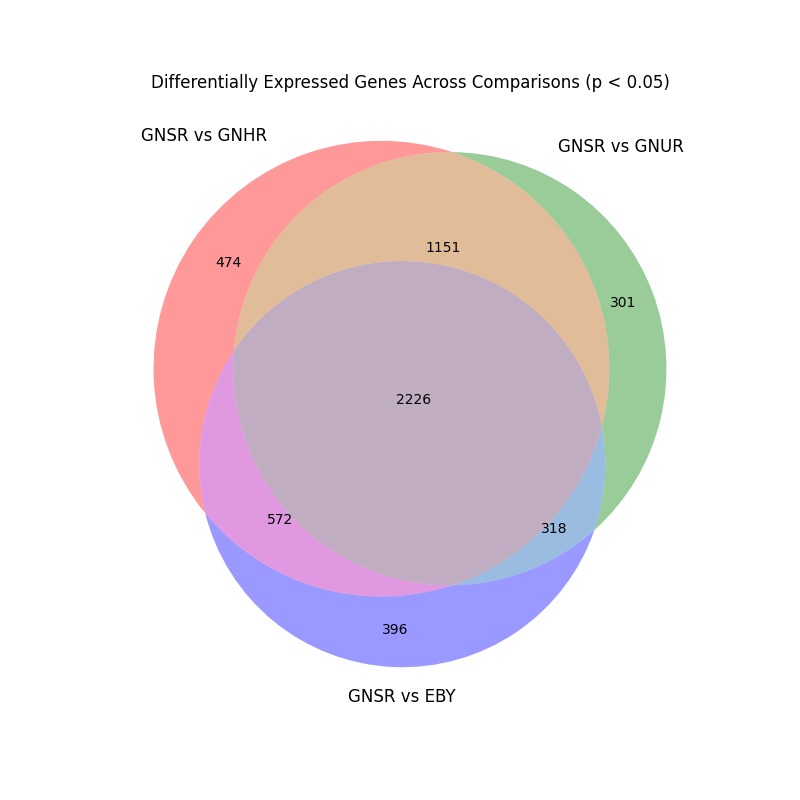

In [24]:
def get_de_genes(df, group1_cols, group2_cols, p_value_threshold=0.05):
    p_values = stats.ttest_ind(
        df[group1_cols],
        df[group2_cols],
        axis=1,
        equal_var=False,
        nan_policy='omit'
    ).pvalue
    significant_df = df[p_values < p_value_threshold]
    return significant_df['Geneid'].tolist()

# Define the column groups for your conditions
eby_cols = ['EBY_1', 'EBY_2', 'EBY_3']
gnsr_cols = ['EBY-GNSR_1', 'EBY-GNSR_2']
gnhr_cols = ['EBY-GNHR_1', 'EBY-GNHR_2', 'EBY-GNHR_3']
gnur_cols = ['EBY-GNUR_1', 'EBY-GNUR_2', 'EBY-GNUR_3']

# Generate the three lists of differentially expressed genes
gnsr_vs_gnhr_genes = get_de_genes(fpkm_df, gnsr_cols, gnhr_cols)
gnsr_vs_gnur_genes = get_de_genes(fpkm_df, gnsr_cols, gnur_cols)
gnsr_vs_eby_genes = get_de_genes(fpkm_df, gnsr_cols, eby_cols)


# --- CORRECTED PLOTTING AND SAVING ---

# Change 1: Explicitly create a new figure and axes for this specific plot
fig, ax = plt.subplots(figsize=(8, 8))

# Change 2: Tell venn3 exactly which axes to draw on by passing ax=ax
venn3(
    [set(gnsr_vs_gnhr_genes), set(gnsr_vs_gnur_genes), set(gnsr_vs_eby_genes)],
    set_labels=('GNSR vs GNHR', 'GNSR vs GNUR', 'GNSR vs EBY'),
    ax=ax
)

ax.set_title("Differentially Expressed Genes Across Comparisons (p < 0.05)")

# Change 3: Save the figure BEFORE showing it
fig.savefig('venn_diagram.pdf', bbox_inches='tight')

# Now, display the plot
plt.show()


/home/codespace/.local/lib/python3.12/site-packages/scipy/stats/_axis_nan_policy.py:611: RuntimeWarning: Precision loss occurred in moment calculation due to catastrophic cancellation. This occurs when the data are nearly identical. Results may be unreliable.
  res = hypotest_fun_out(*samples, axis=axis, **kwds)
/home/codespace/.local/lib/python3.12/site-packages/scipy/stats/_axis_nan_policy.py:611: RuntimeWarning: Precision loss occurred in moment calculation due to catastrophic cancellation. This occurs when the data are nearly identical. Results may be unreliable.
  res = hypotest_fun_out(*samples, axis=axis, **kwds)
/home/codespace/.local/lib/python3.12/site-packages/scipy/stats/_axis_nan_policy.py:611: RuntimeWarning: Precision loss occurred in moment calculation due to catastrophic cancellation. This occurs when the data are nearly identical. Results may be unreliable.
  res = hypotest_fun_out(*samples, axis=axis, **kwds)


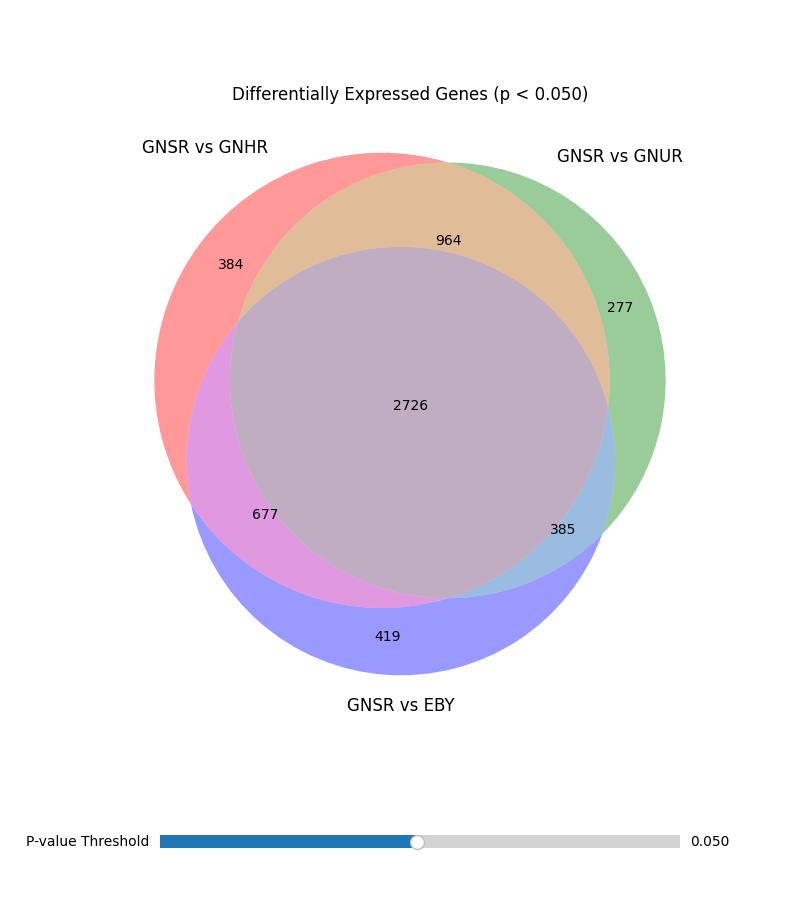

In [25]:
# Define the column groups
eby_cols = ['EBY_1', 'EBY_2', 'EBY_3']
gnsr_cols = ['EBY-GNSR_1', 'EBY-GNSR_2']
gnhr_cols = ['EBY-GNHR_1', 'EBY-GNHR_2', 'EBY-GNHR_3']
gnur_cols = ['EBY-GNUR_1', 'EBY-GNUR_2', 'EBY-GNUR_3']

# 1. PRE-CALCULATE P-VALUES (Efficient approach)
p_vals1 = stats.ttest_ind(fpkm_df[gnsr_cols], fpkm_df[gnhr_cols], axis=1, nan_policy='omit').pvalue
p_vals2 = stats.ttest_ind(fpkm_df[gnsr_cols], fpkm_df[gnur_cols], axis=1, nan_policy='omit').pvalue
p_vals3 = stats.ttest_ind(fpkm_df[gnsr_cols], fpkm_df[eby_cols], axis=1, nan_policy='omit').pvalue

# Create pandas Series to easily link p-values with Geneids
p_series1 = pd.Series(p_vals1, index=fpkm_df['Geneid'])
p_series2 = pd.Series(p_vals2, index=fpkm_df['Geneid'])
p_series3 = pd.Series(p_vals3, index=fpkm_df['Geneid'])

# 2. CREATE THE PLOT LAYOUT
# Make space at the bottom for the slider
fig, ax = plt.subplots(figsize=(8, 9))
plt.subplots_adjust(bottom=0.2)

# 3. DEFINE THE UPDATE FUNCTION
def update(p_value_threshold):
    # a. Filter genes based on the new threshold
    set1 = set(p_series1[p_series1 < p_value_threshold].index)
    set2 = set(p_series2[p_series2 < p_value_threshold].index)
    set3 = set(p_series3[p_series3 < p_value_threshold].index)

    # b. Clear the previous Venn diagram
    ax.clear()

    # c. Draw the new Venn diagram
    venn3(
        [set1, set2, set3],
        set_labels=('GNSR vs GNHR', 'GNSR vs GNUR', 'GNSR vs EBY'),
        ax=ax
    )
    ax.set_title(f"Differentially Expressed Genes (p < {p_value_threshold:.3f})")
    fig.canvas.draw_idle()

# 4. CREATE THE SLIDER
slider_ax = fig.add_axes([0.20, 0.05, 0.65, 0.03]) # [left, bottom, width, height]
p_val_slider = Slider(
    ax=slider_ax,
    label='P-value Threshold',
    valmin=0.001,
    valmax=0.1,
    valinit=0.05, # Initial p-value
    valfmt='%1.3f'
)

# 5. CONNECT THE SLIDER TO THE UPDATE FUNCTION
p_val_slider.on_changed(update)

# 6. INITIAL DRAW
update(0.05)

plt.show()

In [ ]:
p_values_for_gif = np.linspace(0.1, 0.001, num=30) # 30 frames from 0.1 down to 0.001

# Define the animation function
def animate_slider(p_val):
    # Update the Venn diagram by calling the existing function
    update(p_val)
    # Update the slider's visual position
    p_val_slider.set_val(p_val)

# Create the animation
ani_slider = animation.FuncAnimation(
    fig, 
    animate_slider, 
    frames=p_values_for_gif,
    interval=150 # 150ms delay between frames
)

# Save the animation as a GIF
ani_slider.save('slider_animation.gif', writer='pillow', fps=10)
print("Slider GIF saved!")

Slider GIF saved!
